##### Prob 1.1
 - 읽은 이미지를 각각 horizon 성분, vertical 성분으로 convolution 한뒤 3x3 window를 적용하여 다시한번 필터링하여 만든 Ix2, Iy2, Ixy를 이용하여 Harris matrix H 를 구했다  
 - 또한 H matrix의 값으로부터 Harmonic mean을 이용, 그리고 H matrix의 eigen value의 min 값을 이용해 각각 harris corner detector와의 Shi-Tomasi detector를 구현하였다.

 - 이때 matlab의 conv2 함수의 경우 index를 벗어난경우 padding이 적용되기 때문에 경계 픽셀을 다루는 경우에도 문제가 없다.


In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
print("done")

done


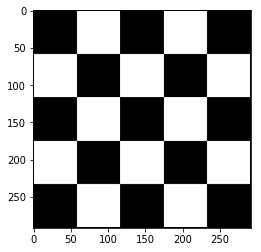

In [190]:
img = cv2.imread('checkerboard.png',1)
row = img.shape[0]
col = img.shape[1]
# print(row,col)
filt_hor = np.array([[-1,1]])*5
filt_ver = np.array([[-1],[1]])*5
# print(filt_hor)
# print(filt_ver)
plt.imshow(img)

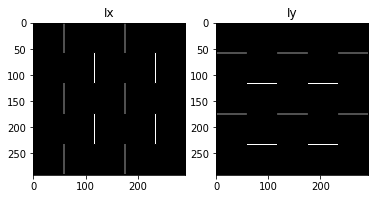

In [191]:
# print(img)
Ix = cv2.filter2D(img,-1,filt_hor)
Iy = cv2.filter2D(img,-1,filt_ver)
# print(Ix)
plt.subplot(1,2,1)
plt.title("Ix")
plt.imshow(Ix)
plt.subplot(1,2,2)
plt.title('Iy')
plt.imshow(Iy)

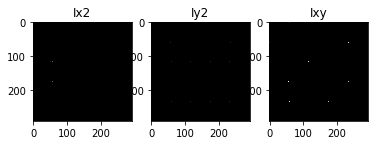

In [192]:
Ix2 = Ix**2
Iy2 = Iy**2
Ixy = Ix*Iy
plt.subplot(1,3,1)
plt.title("Ix2")
plt.imshow(Ix2)
plt.subplot(1,3,2)
plt.title('Iy2')
plt.imshow(Iy2)
plt.subplot(1,3,3)
plt.title('Ixy')
plt.imshow(Ixy)
win = np.ones([3,3])

In [193]:
sum_Ix2 = cv2.filter2D(Ix2,-1,win)
sum_Iy2 = cv2.filter2D(Iy2,-1,win)
sum_Ixy = cv2.filter2D(Ixy,-1,win)

Harmonic = np.zeros((row, col,3)); 
Shitomasi = np.zeros((row, col,3));

C:\Users\GUR\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


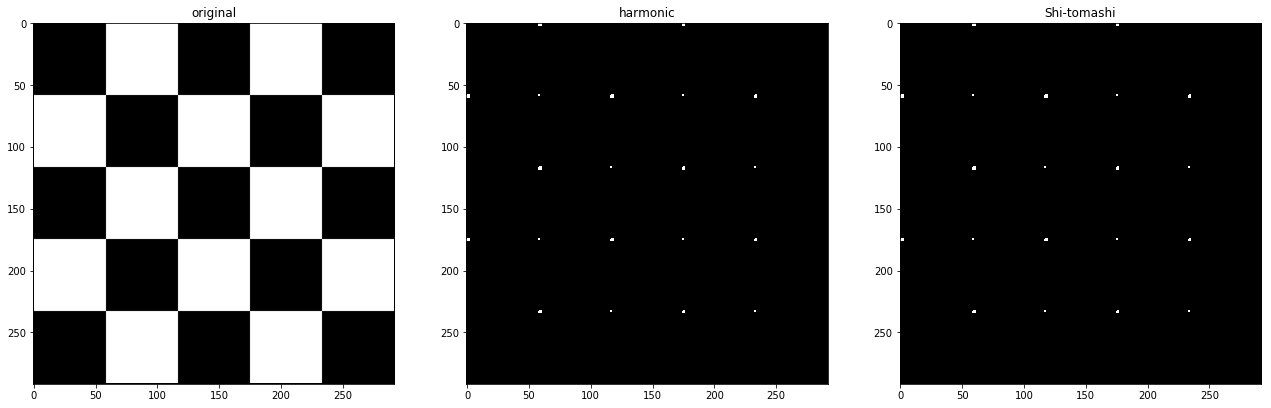

In [185]:
for x in range(row):
    for y in range(col):
        a = sum_Ix2[x][y][0]; b = sum_Ixy[x][y][0]; c = sum_Iy2[x][y][0]
        M = [[a,b],[b,c]]
        R1 = np.linalg.det(M)/np.trace(M)
        eig_val = np.linalg.eigvals(M)
        eig_val = np.absolute(eig_val)
        R2 = eig_val.min()
        for i in range(3):
            Harmonic[x][y][i] = R1
            Shitomasi[x][y][i] = R2
            
plt.figure(figsize=(22,10)) 
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(img)
plt.subplot(1,3,2)
plt.title('harmonic')
plt.imshow(Harmonic)
plt.subplot(1,3,3)
plt.title('Shi-tomashi')
plt.imshow(Shitomasi)
